# Tasca M10 T01 - Exercicis de Web Scraping
## Luis Pardina - Data Science - 12/07/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

In [1]:
import requests                               # to make the request to the web page
from bs4 import BeautifulSoup                 # BeatifulSoup web scraping tool

In [22]:
from selenium import webdriver                # to get the driver with selenium
from selenium.webdriver.common.by import By   # to select the parser 

In [44]:
! pip install scrapy                          # I had to install scrapy                       

  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=12559 sha256=5532aa60816077f8c3ca0c18fe322ebf17fda5cb732c19dcaafc0ce9fa14028c
  Stored in directory: c:\users\chufl\appdata\local\pip\cache\wheels\a5\de\8a\4b52190a95d99c042ec6bd5ad2de3a3c1b5ce71d69f0bbd036
Successfully built PyDispatcher


In [45]:
from scrapy import Selector                   # to parse HTLM content with Scrapy

#### *Exercici 1*: Realitza web scraping de dues de les tres pàgines web proposades utilitzant BeautifulSoup primer i Selenium després. 

- http://quotes.toscrape.com

- https://www.bolsamadrid.es

- www.wikipedia.es (fes alguna cerca primer i escrapeja algun contingut)

I start with the **first web page** and **BeatifulSoup**. It is a web intended to practice scraping, that contains quotations of famous people. The quotations are tagged by topic. I make a selection of quotes related with *life*:

In [3]:
url = 'http://quotes.toscrape.com/tag/life/'

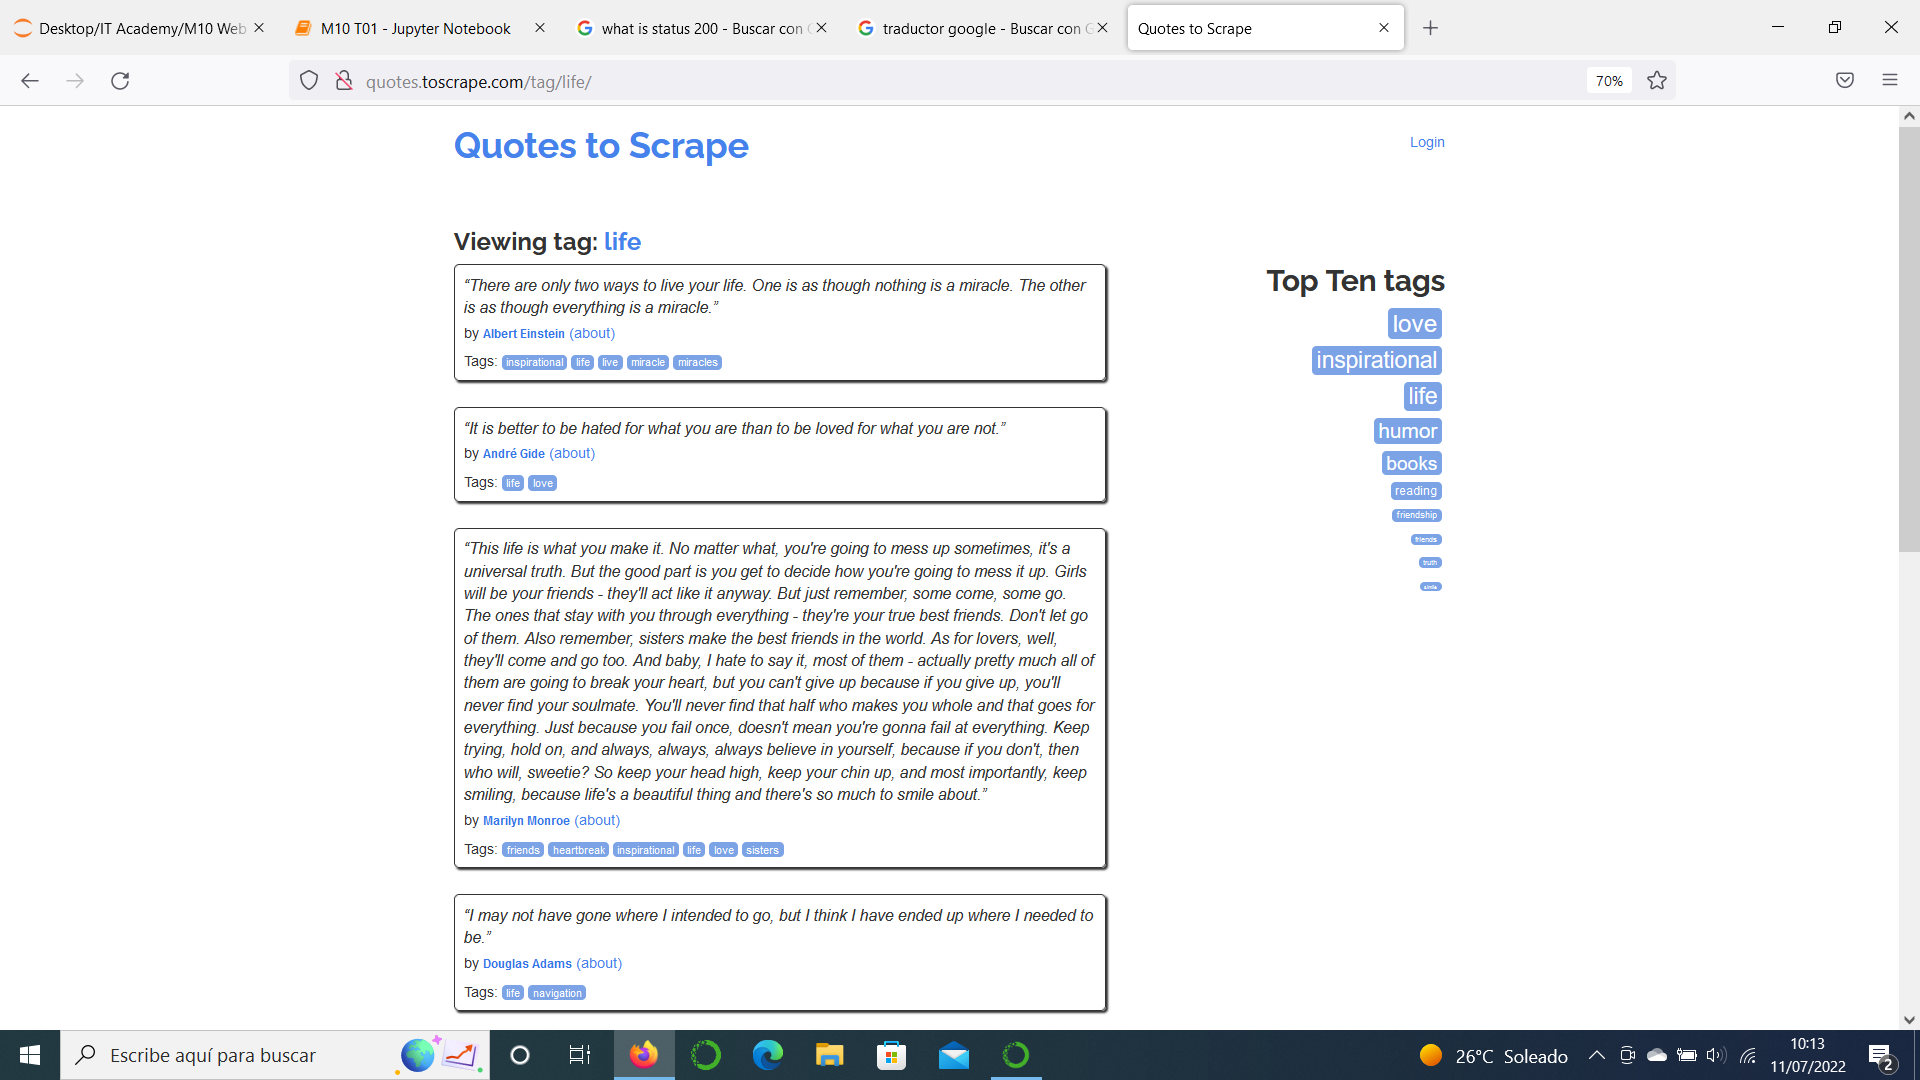

The library *requests* is needed to make my request to the website because it can’t make a request to a particular server. To overcome this issue It takes the help of the most popular library named Requests or urlib2. These libraries will help us to make our request to the server.

I create the object *page* by requesting to the webpage to get its content. The HTTP 200 status response code indicates that the request has succeeded. It means, simply, that the request was received and understood and is being processed.

In [4]:
page = requests.get(url)
page.status_code

200

I can inspect the HTML text that represents the DOM with the help of the attribute *text* :

In [5]:
print(page.text)

<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
            <div class="col-md-8">
                <h1>
                    <a href="/" style="text-decoration: none">Quotes to Scrape</a>
                </h1>
            </div>
            <div class="col-md-4">
                <p>
                
                    <a href="/login">Login</a>
                
                </p>
            </div>
        </div>
    

<h3>Viewing tag: <a href="/tag/life/page/1/">life</a></h3>

<div class="row">
    <div class="col-md-8">

    <div class="quote" itemscope itemtype="http://schema.org/CreativeWork">
        <span class="text" itemprop="text">“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though ev

In [6]:
type(page)

requests.models.Response

Now we "create" the BeautifulSoup object with the content of the page. We then can use the methods and attributes of our "soup" to scrap the different contents of the webpage. 

In [7]:
soup = BeautifulSoup(page.content, "html.parser")

In [8]:
soup.title

<title>Quotes to Scrape</title>

In [9]:
soup.title.string

'Quotes to Scrape'

We can use the *.find_all()* method to find every "a" element that has an href attribute (a link), and print each one:

In [10]:
print(soup.a)

<a href="/" style="text-decoration: none">Quotes to Scrape</a>


In [11]:
soup.find_all('a')

[<a href="/" style="text-decoration: none">Quotes to Scrape</a>,
 <a href="/login">Login</a>,
 <a href="/tag/life/page/1/">life</a>,
 <a href="/author/Albert-Einstein">(about)</a>,
 <a class="tag" href="/tag/inspirational/page/1/">inspirational</a>,
 <a class="tag" href="/tag/life/page/1/">life</a>,
 <a class="tag" href="/tag/live/page/1/">live</a>,
 <a class="tag" href="/tag/miracle/page/1/">miracle</a>,
 <a class="tag" href="/tag/miracles/page/1/">miracles</a>,
 <a href="/author/Andre-Gide">(about)</a>,
 <a class="tag" href="/tag/life/page/1/">life</a>,
 <a class="tag" href="/tag/love/page/1/">love</a>,
 <a href="/author/Marilyn-Monroe">(about)</a>,
 <a class="tag" href="/tag/friends/page/1/">friends</a>,
 <a class="tag" href="/tag/heartbreak/page/1/">heartbreak</a>,
 <a class="tag" href="/tag/inspirational/page/1/">inspirational</a>,
 <a class="tag" href="/tag/life/page/1/">life</a>,
 <a class="tag" href="/tag/love/page/1/">love</a>,
 <a class="tag" href="/tag/sisters/page/1/">siste

Out of them I select the links that point to a different webpage:

In [12]:
for link in soup.find_all('a'):
    if link.get('href'):
        text_link=link.get('href')        
        if re.findall("\Ahttp", text_link ):
            print(link.get('href'))

https://www.goodreads.com/quotes
https://scrapinghub.com


The *.get_text()* method gets the text out of the "soup":

In [13]:
print(soup.get_text())





Quotes to Scrape








Quotes to Scrape




Login



Viewing tag: life



“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
by Albert Einstein
(about)


            Tags:
            
inspirational
life
live
miracle
miracles



“It is better to be hated for what you are than to be loved for what you are not.”
by André Gide
(about)


            Tags:
            
life
love



“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually

From the inspection of the HTML text I see that the quotations are placed within a *class_* called "quote". I extract this information and I check that I got the ten quotes that appear on the website.

In [14]:
table1 = soup.find_all(class_ = "quote")

In [15]:
len(table1)

10

By inspecting what I've extracted I see that the text of the quotation is within the class_ "text" and the name of the author is within the class_ "author". I scrap very easily both informations with the help of the *.find()* method and the *.text* attribute:

In [16]:
table1[0]

<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="inspirational,life,live,miracle,miracles" itemprop="keywords"/>
<a class="tag" href="/tag/inspirational/page/1/">inspirational</a>
<a class="tag" href="/tag/life/page/1/">life</a>
<a class="tag" href="/tag/live/page/1/">live</a>
<a class="tag" href="/tag/miracle/page/1/">miracle</a>
<a class="tag" href="/tag/miracles/page/1/">miracles</a>
</div>
</div>

In [17]:
author = []
quote = []

for i in table1:
    quote.append(i.find(class_= "text").text)
    author.append(i.find(class_ = "author").text)

In [18]:
author

['Albert Einstein',
 'André Gide',
 'Marilyn Monroe',
 'Douglas Adams',
 'Mark Twain',
 'Allen Saunders',
 'Dr. Seuss',
 'Albert Einstein',
 'George Bernard Shaw',
 'Ralph Waldo Emerson']

In [19]:
quote

['“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, d

And finally I present the scraped information in a DataFrame:

In [20]:
table2 = pd.DataFrame({'Author':author,'Quote':quote})
pd.options.display.max_colwidth = 2000
table2.style.set_properties(**{'text-align': 'left'})

,Author,Quote
0,Albert Einstein,“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
1,André Gide,“It is better to be hated for what you are than to be loved for what you are not.”
2,Marilyn Monroe,"“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly, keep smiling, because life's a beautiful thing and there's so much to smile about.”"
3,Douglas Adams,"“I may not have gone where I intended to go, but I think I have ended up where I needed to be.”"
4,Mark Twain,"“Good friends, good books, and a sleepy conscience: this is the ideal life.”"
5,Allen Saunders,“Life is what happens to us while we are making other plans.”
6,Dr. Seuss,"“Today you are You, that is truer than true. There is no one alive who is Youer than You.”"
7,Albert Einstein,"“Life is like riding a bicycle. To keep your balance, you must keep moving.”"
8,George Bernard Shaw,“Life isn't about finding yourself. Life is about creating yourself.”
9,Ralph Waldo Emerson,“Finish each day and be done with it. You have done what you could. Some blunders and absurdities no doubt crept in; forget them as soon as you can. Tomorrow is a new day. You shall begin it serenely and with too high a spirit to be encumbered with your old nonsense.”


I continue with the **second webpage** and **Selenium**. The webpage is the official site of the *Bolsa de Madrid*. It contains many diferent informations we may want to scrap. I select a page that contains the updated Ibex 35 index, with the price of the stock of the biggest 35 companies of the Spanish stock market.

First, Selenium requires to use the appropriate webdriver based on the web browser, in my case it is Firefox.

In [3]:
driver = webdriver.Firefox(executable_path = 'C:\Program Files\Geckodriver\geckodriver.exe')

In [26]:
url = 'https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000'

I get the url content into my driver object:

In [27]:
driver.get(url)

I plan to scrap the table with the stock prices. It is identified as id="ct100_Contenido_tblAcciones". 

So first I get the table using the *.find_elements* method with the id of the table and looking for the elements < tr> (when a new row starts).

Second, to create a DataFrame from this information. I need to find two types of elements:

        < th> : column names   
        < td> : each particular item within the table

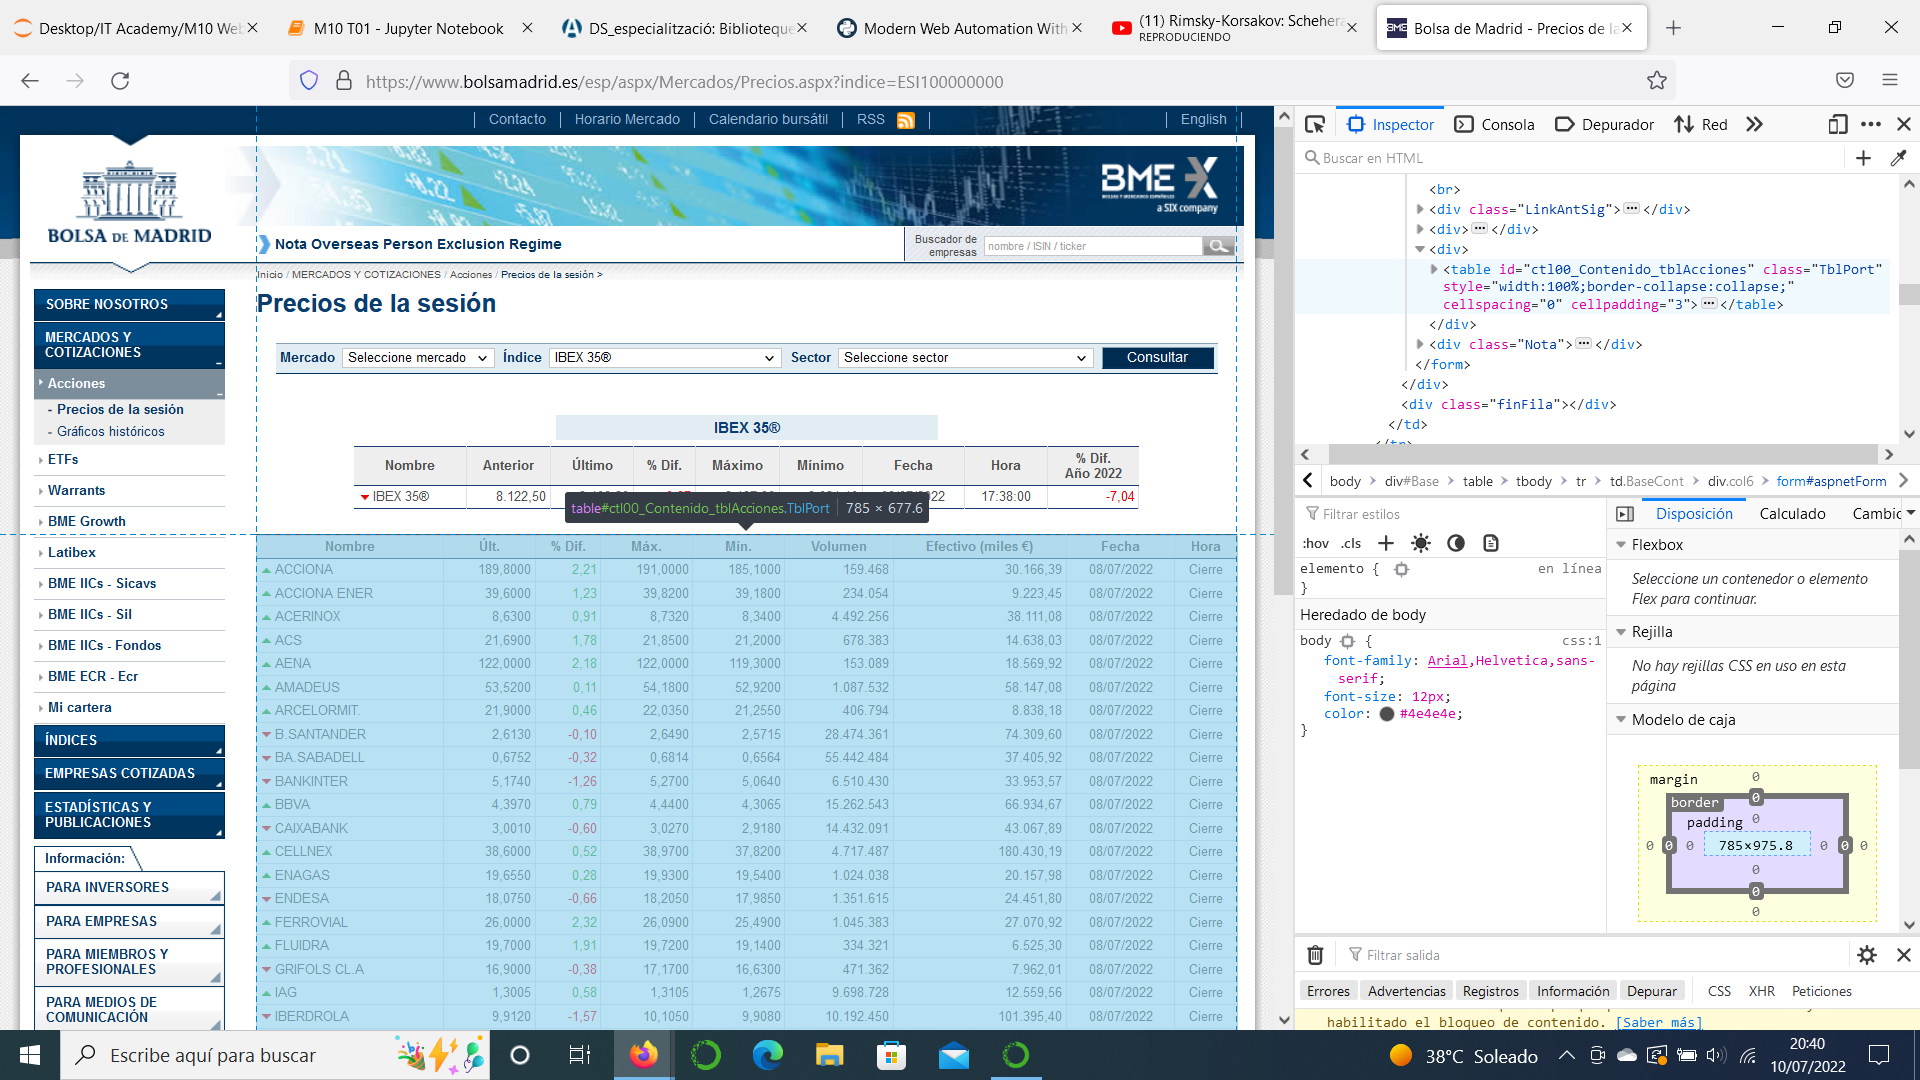

In [31]:
table = []
object = driver.find_elements(by= By.XPATH, value = '//*[contains(@id,"ctl00_Contenido_tblAcciones")]//tr')
for element in object:
    row = [item.text for item in element.find_elements(by= By.XPATH, value= ".//*[self::td or self::th]")]
    table.append(row)

I've got the 36 rows (the first row is the contain column names, and the other 35 the stock price figures):

In [30]:
len(object)

36

In [32]:
len(table)

36

In [33]:
table

[['Nombre',
  'Últ.',
  '% Dif.',
  'Máx.',
  'Mín.',
  'Volumen',
  'Efectivo (miles €)',
  'Fecha',
  'Hora'],
 ['ACCIONA',
  '189,8000',
  '2,21',
  '191,0000',
  '185,1000',
  '159.468',
  '30.166,39',
  '08/07/2022',
  'Cierre'],
 ['ACCIONA ENER',
  '39,6000',
  '1,23',
  '39,8200',
  '39,1800',
  '234.054',
  '9.223,45',
  '08/07/2022',
  'Cierre'],
 ['ACERINOX',
  '8,6300',
  '0,91',
  '8,7320',
  '8,3400',
  '4.492.256',
  '38.111,08',
  '08/07/2022',
  'Cierre'],
 ['ACS',
  '21,6900',
  '1,78',
  '21,8500',
  '21,2000',
  '678.383',
  '14.638,03',
  '08/07/2022',
  'Cierre'],
 ['AENA',
  '122,0000',
  '2,18',
  '122,0000',
  '119,3000',
  '153.089',
  '18.569,92',
  '08/07/2022',
  'Cierre'],
 ['AMADEUS',
  '53,5200',
  '0,11',
  '54,1800',
  '52,9200',
  '1.087.532',
  '58.147,08',
  '08/07/2022',
  'Cierre'],
 ['ARCELORMIT.',
  '21,9000',
  '0,46',
  '22,0350',
  '21,2550',
  '406.794',
  '8.838,18',
  '08/07/2022',
  'Cierre'],
 ['B.SANTANDER',
  '2,6130',
  '-0,10',
  '2,6

I can close the driver now

In [10]:
driver.quit()

And finally I present the information in a DataFrame:

In [35]:
precios_de_la_sesion = pd.DataFrame(table[1:], columns = table[0])
precios_de_la_sesion

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"189,8000","2,21","191,0000","185,1000",159.468,"30.166,39",08/07/2022,Cierre
1,ACCIONA ENER,"39,6000","1,23","39,8200","39,1800",234.054,"9.223,45",08/07/2022,Cierre
2,ACERINOX,"8,6300","0,91","8,7320","8,3400",4.492.256,"38.111,08",08/07/2022,Cierre
3,ACS,"21,6900","1,78","21,8500","21,2000",678.383,"14.638,03",08/07/2022,Cierre
4,AENA,"122,0000","2,18","122,0000","119,3000",153.089,"18.569,92",08/07/2022,Cierre
5,AMADEUS,"53,5200","0,11","54,1800","52,9200",1.087.532,"58.147,08",08/07/2022,Cierre
6,ARCELORMIT.,"21,9000","0,46","22,0350","21,2550",406.794,"8.838,18",08/07/2022,Cierre
7,B.SANTANDER,"2,6130","-0,10","2,6490","2,5715",28.474.361,"74.309,60",08/07/2022,Cierre
8,BA.SABADELL,"0,6752","-0,32","0,6814","0,6564",55.442.484,"37.405,92",08/07/2022,Cierre
9,BANKINTER,"5,1740","-1,26","5,2700","5,0640",6.510.430,"33.953,57",08/07/2022,Cierre


### *Exercici 2*: Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.


### table2

Content : This panda DataFrame contains quotations made by 10 famous people about life

Description of each column of the DataFrame:

    author: person who made the quotation
    quotation

Acknowledgement: http://quotes.toscrape.com/tag/life/

### precios_de_la_sesion

Content : This panda DataFrame contains information about stock prices of the 35 companies belonging to the IBEX 35 index at the COB on Jul. 8th, 2022

Description of each column of the DataFrame:

    Nombre: Name of the Company (alphabetical order)
    Últ.: Stock price (in €).
    % Dif: Percentage difference with respect to the opening price.
    Máx. : Maximum price in the session.
    Mín. : Minimum price in the session.
    Volumen : Number of transactions of the asset carried out until the close of the trading session.
    Efectivo (miles €) : Transactions carried out up to the close of the trading session, expressed in thousands of euros.
    Fecha : Date of the session, July 8th.
    Hora : Time of of the day. If 'Cierre' means the session is closed.

Acknowledgement: https://www.bolsamadrid.es/esp/aspx/Mercados/Precios.aspx?indice=ESI100000000

### *Exercici 3*: Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Selenium primer i Scrapy després. 

Now I proceed to do the scraping of the news headlines of the Diario del Alto Aragón with the help of **scrapy**.

In [62]:
url ='https://www.diariodelaltoaragon.es/'

In [63]:
html = requests.get(url).content

To scrap the news headlines I parse HTML content with the Scrapy Selector library, and then I select all the hyperlinks under the class called "menu_header_1":

In [64]:
sel = Selector(text = html)

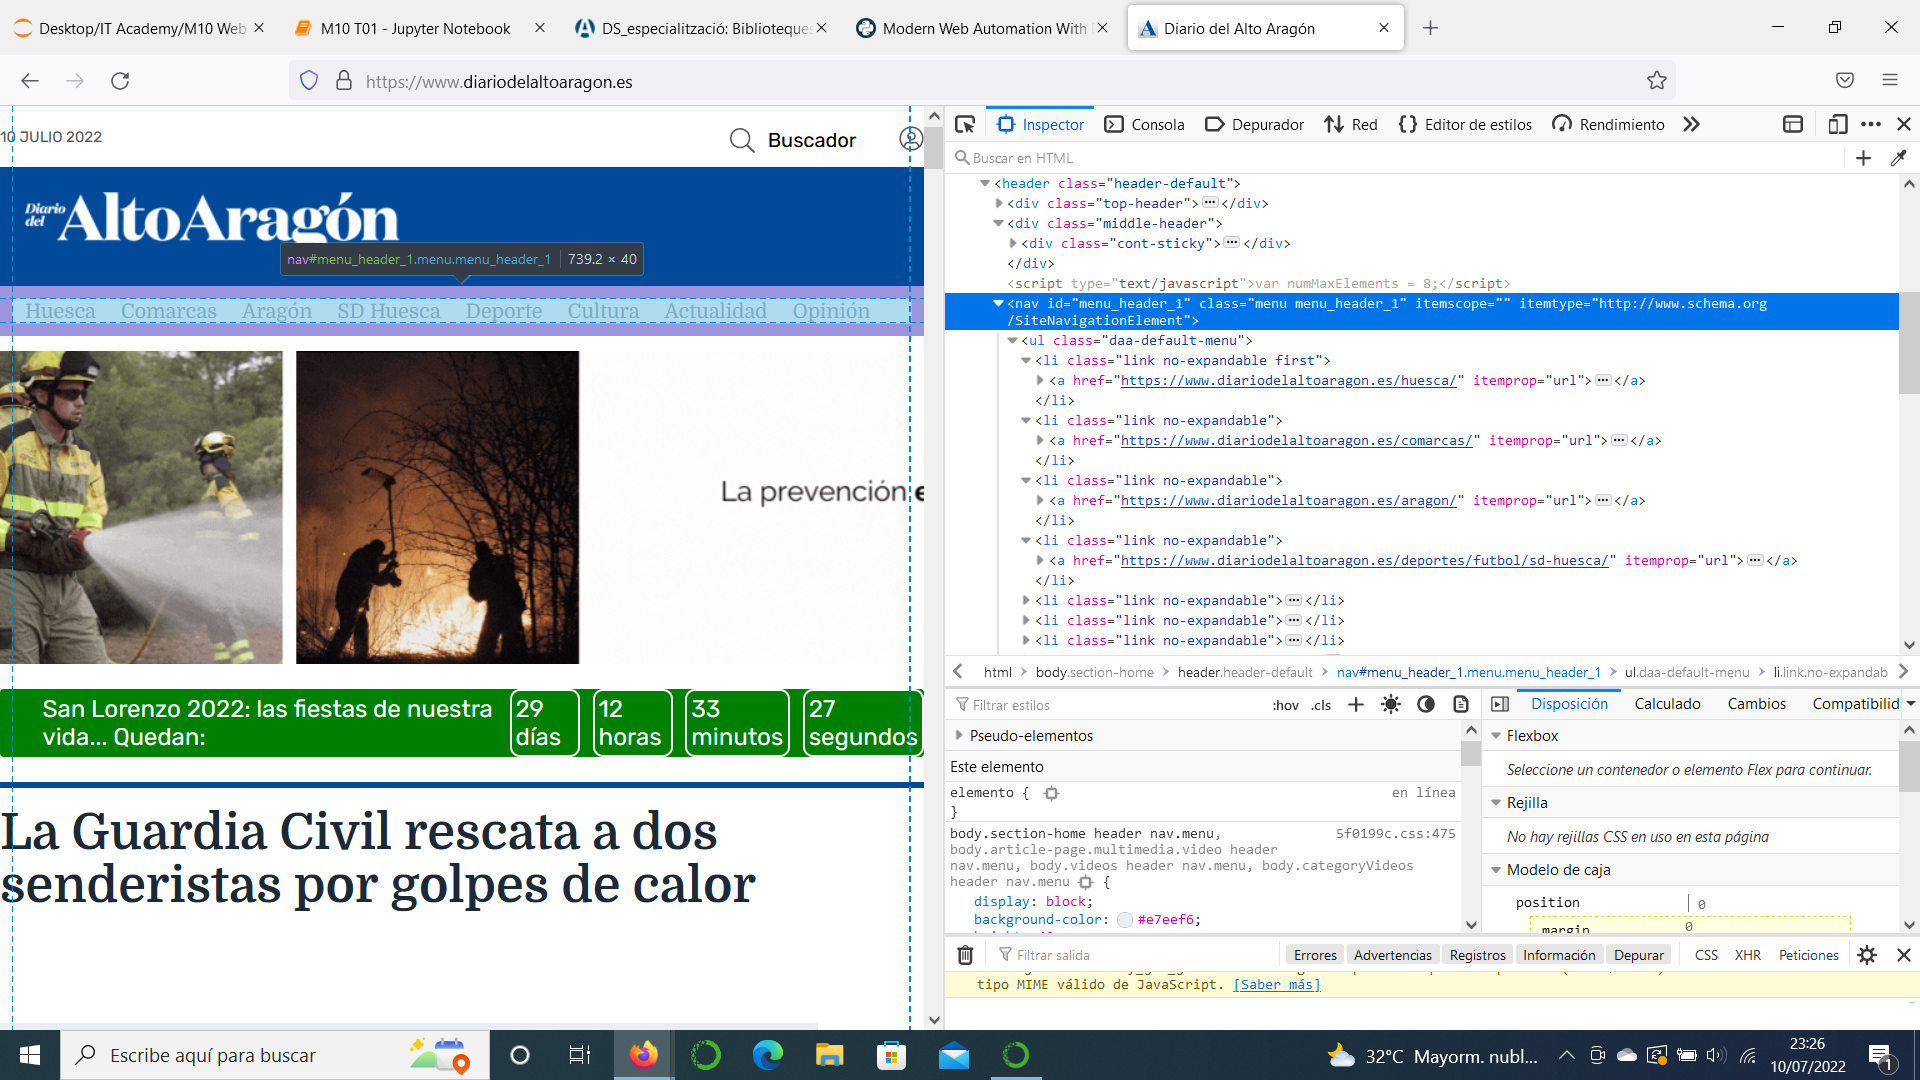

In [76]:
links = sel.xpath ('//nav[@id="menu_header_1"]//a/@href').extract()
links

['https://www.diariodelaltoaragon.es/huesca/',
 'https://www.diariodelaltoaragon.es/comarcas/',
 'https://www.diariodelaltoaragon.es/aragon/',
 'https://www.diariodelaltoaragon.es/deportes/futbol/sd-huesca/',
 'https://www.diariodelaltoaragon.es/deportes/',
 'https://www.diariodelaltoaragon.es/cultura/',
 'https://www.diariodelaltoaragon.es/actualidad/',
 'https://www.diariodelaltoaragon.es/opinion/']

Out of the links I select the one that contains the news headlines for *comarcas*:

In [77]:
outcome = []
for link in links:
    if 'comarcas' in link:
        outcome.append(link)
        break

In [78]:
outcome

['https://www.diariodelaltoaragon.es/comarcas/']

In [80]:
html = requests.get(outcome[0]).content

In [81]:
html

b'<!DOCTYPE html>\n<html>\n    <head>\n        <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n            <meta name="viewport" content="width=1024">\n        \n            <link rel="dns-prefetch" href="//cdns.gigya.com">\n        <link rel="dns-prefetch" href="//cdns.eu1.gigya.com">\n        <link rel="preconnect" href="https://fonts.googleapis.com" />\n        <link rel="dns-prefetch" href="//fonts.gstatic.com">\n        <link rel="preconnect" href="https://sdk.privacy-center.org">\n        <link rel="preconnect" href="https://hb.20m.es">\n        <link rel="dns-prefetch" href="//securepubads.g.doubleclick.net">\n        <link rel="dns-prefetch" href="//c.amazon-adsystem.com">\n        <link rel="dns-prefetch" href="//pghub.io">\n        <link rel="dns-prefetch" href="//cmanager-prometeo.appspot.com">\n        <link rel="dns-prefetch" href="//sb.scorecardresearch.com">\n        <link rel="dns-prefetch" href="//www.googletagmanager.com">\n        <link rel="dn

I parse HTML content with the Scrapy Selector library. Then I found all the tags "articles"
 and I extract the text.

In [82]:
sel = Selector(text = html)

In [98]:
news_headlines = sel.xpath('//article/div/h1/a/text()').extract()

I edit the list to make it readable:

In [110]:
comarcas =[]
for i in news_headlines:
    i = re.sub("  ","",i)
    i = re.sub("\n","",i)
    comarcas.append(i)

In [111]:
comarcas

['La Guardia Civil rescata a dos senderistas por golpes de calor',
 'Santa Orosia, brilla como la reina de las montañas',
 'Más de 50 cruces en una romería histórica a San Úrbez',
 'Un vecino de Monzón herido grave por la salida de un vehículo en Alfántega',
 'Histórica romería a San Úrbez',
 'Robres se consolida como escenario de recreación histórica de la Guerra Civil',
 'Poesía y naturaleza se unen en Pineta dentro de una exposición',
 '‘Revuelta Rural’ premia 27 iniciativas de emprendimiento',
 'Arén abre el Museo de los Dinosaurios y el Centro de Interpretación',
 '40 años de Estatuto: gobernar desde la cercanía con el reto de la financiación',
 '“Algunos vecinos no se atreven a salir solos por su pueblo”',
 'Concentración en Canfranc para pedir la reapertura del PAC',
 'Canfranc se echa a las calles exigiendo reabrir el PAC',
 'Muere un joven leridano de 21 años en el embalse de Santa Ana en Castillonroy',
 'Comienza la restauración de las arquerías del claustro de San Juan de la

Now I execute the scraping of headlines with Selenium:

In [34]:
driver = webdriver.Firefox(executable_path = 'C:\Program Files\Geckodriver\geckodriver.exe')

In [91]:
url = 'https://www.diariodelaltoaragon.es/'

In [92]:
driver.get(url)

In [93]:
#Finds the container that contains every news article.
main_news_container = driver.find_element_by_class_name('menu_header_1')

In [94]:
#In main container get 'a'
text_sections = main_news_container.find_elements_by_xpath("//a[@href]")

In [103]:
comarcas = []
for elem in text_sections:
    if "/comarcas/" in elem.get_attribute("href"):
        #this is printing the Headline
         if (elem.text != ""):
                comarcas.append(elem.text)

In [104]:
comarcas

['Comarcas',
 'Detenido con un machete y un revolver de aire comprimido tras amenazar a los clientes de un bar de Lanaja',
 'Gendarmes franceses se suman a la búsqueda en Jaca del autor del doble crimen',
 'El protocolo entre Medio Natural y AFC permite filmar diez películas en Aragón']

In [105]:
driver.quit()

As a final comment, I found this article below interesting. It compares the three web scraping tools I have used in the exercise:

https://medium.com/analytics-vidhya/scrapy-vs-selenium-vs-beautiful-soup-for-web-scraping-24008b6c87b8